In [46]:
# In this project we combine the sampler qnn and pytorch
# First lets import some dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn

# Quantum Machine Learning
import qiskit
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals as alg
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import ZZFeatureMap,RealAmplitudes


In [2]:
# lets load in the data
# The data is for a classification problem ,PCOS fertility
df = pd.read_csv("C:\\Datasets\\pcos\\PCOS_infertility.csv")

In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [4]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [5]:
df.drop(['Patient File No.','Sl. No'],axis=1,inplace=True)

In [6]:
df.head()

,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,0,1.99,1.99,2.07
1,0,60.80,1.99,1.53
2,1,494.08,494.08,6.63
3,0,1.99,1.99,1.22
4,0,801.45,801.45,2.26


In [7]:
# Our Task it to classify the patients as either  having  PCOS or Not(Binary Classification)

In [66]:
# We need to define our features
X = df.drop(['PCOS (Y/N)','AMH(ng/mL)'],axis=1).values
y = df['PCOS (Y/N)'].values

In [69]:
# I will rescale the values of X so that our model learns better
# To note that I will use Logistic Regression for my Experiment on Classical Machine Learning
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [84]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# CLASSICAL MACHINE LEARNING : LOGISTIC REGRESSION

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print(f"The Mean Squared Error for our Logistic Model is {mean_squared_error(y_test,lr_predictions)}") # Low Rmse ,good model


The Mean Squared Error for our Logistic Model is 0.29357798165137616


# QUANTUM MACHINE LEARNING 

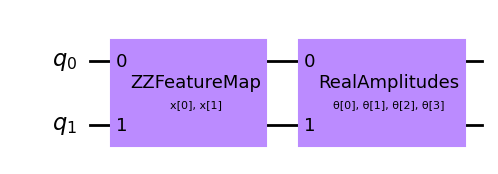

In [86]:
# Create a QuantumCircuit
qc=  QuantumCircuit(2)
feature_map = ZZFeatureMap(2)
ansatz = RealAmplitudes(2,reps=1)
qc.compose(feature_map,inplace=True)
qc.compose(ansatz,inplace=True)
qc.draw("mpl")

In [87]:
# Sampler QNN takes in an interpret function
def interpret(x):
    return "{b}".format(x).count("1")%2
pass

In [88]:
# Lets instantiate the SamplerQNN
qnn = SamplerQNN(circuit=qc,input_params = feature_map.parameters,
                weight_params = ansatz.parameters)

In [89]:
qnn

In [90]:
# I will create Initial Weights
alg.random_seed=(2023)
initial_weights = 0.1 * (alg.random.random(qnn.num_weights))
print(f"The Initial Weights for The Sample QNN are {initial_weights}")

The Initial Weights for The Sample QNN are [0.00880545 0.022044   0.01131706 0.04429668]


# MERGING CLASSICAL AND QUANTUM MACHINE LEARNING 

In [91]:
# instatiate the Torch Connector 
# This feeds a pytorch module into our quantum circuit
# Of course we can do the Pytorch deep learning separately but TorchConnector does that for us
from qiskit_machine_learning.connectors import TorchConnector

In [92]:
model = TorchConnector(qnn,initial_weights)

In [93]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [94]:
# Since this is a Pytorch Module ,we will be forced to convert data into Tensors
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [95]:
model(X_train[:3])

tensor([[8.1414e-01, 1.8492e-01, 9.0137e-04, 4.0284e-05],
        [8.1414e-01, 1.8492e-01, 9.0137e-04, 4.0284e-05],
        [8.1414e-01, 1.8492e-01, 9.0137e-04, 4.0284e-05]],
       grad_fn=<_TorchNNFunctionBackward>)

# TRAINING AND TESTING LOOP FOR OUR HYBRID QNN

In [96]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs  = 10
for epoch in range (epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = criterion(y_pred,y_test)
        if epoch % 2 == 0 :
            print(f"Epoch{epoch}|Training Loss{loss}|test loss {test_loss}")

Epoch0|Training Loss1.1039071083068848|test loss 1.0689672231674194
Epoch2|Training Loss1.1039063930511475|test loss 1.0689667463302612
Epoch4|Training Loss1.1039056777954102|test loss 1.068966031074524
Epoch6|Training Loss1.1039049625396729|test loss 1.0689654350280762
Epoch8|Training Loss1.1039042472839355|test loss 1.0689647197723389


# THE END OF THE NOTEBOOK